# World Cup Data Exploration
## by (Mukthar Abdulwaheed Olakunle)

## Introduction

Data from all World Cup results (1930-2014), details for each match (Date, Stage, City, Ref, Home Team, Away Team, Goals, Goals at Half, etc), and details for events (year of each tournament, host nation, etc). 

Data source; Gotten from [MavenAnalytics](https://www.mavenanalytics.io/data-playground?page=5&pageSize=5), source was derived from FIFA World Cup Archive

 



## Preliminary Wrangling

This is an exploration of 3 world cup datset that gives a detailed analysis of the most important events in the history of world cup.
> **World Cup Matches** is the first dataset with over 800 matches.

> **World Cup Players** is the next data with over 37,000 players details.

> **World Cup Preview** gives details of year of tournamnets, hosting country, total goals scored, winners, etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
matches = pd.read_csv(r'WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
preview = pd.read_csv(r'WorldCups_preview.csv')

### Wrangling for the Matches dataset

In [3]:
# let's have an overview of the dataset
# 1. World Cup Matches
print(matches.shape)
matches.head()

(852, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


The data wrangling to be done are;
- Create a new columns in matches dataset, that shows **win**, **loss** or **draw** based on goals scored between `Home Team Goals` and `Home Team Goals`

In [4]:
# defining a function to create a new column where we to show the results of the home team 
def home_team(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Win'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Loss'
    else:
        return 'Draw'

matches = matches.assign(Home_Team_Results=matches.apply(home_team, axis=1))

In [5]:
# defining a function to create a new column where we to show the results of the away team 
def away_team(row):
    if row['Away Team Goals'] > row['Home Team Goals']:
        return 'Win'
    elif row['Away Team Goals'] < row['Home Team Goals']:
        return 'Loss'
    else:
        return 'Draw'
    
matches = matches.assign(Away_Team_Results=matches.apply(away_team, axis=1))

In [6]:
# let's confirm the new columns
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Home_Team_Results,Away_Team_Results
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,Win,Loss
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,Win,Loss
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,Win,Loss
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,Win,Loss
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,Win,Loss


Note that the value counts of `Home_Team_Results` and `Home_Team_Results` will be the same, the column is needed for analysis to know the teams performance both as home team and away team. 

In [7]:
matches.Home_Team_Results.value_counts()

Win     488
Draw    190
Loss    174
Name: Home_Team_Results, dtype: int64

In [8]:
matches.Away_Team_Results.value_counts()

Loss    488
Draw    190
Win     174
Name: Away_Team_Results, dtype: int64

In [9]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Home_Team_Results', 'Away_Team_Results'],
      dtype='object')

In [10]:
# checking the dtypes
matches.dtypes

Year                      int64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals           int64
Away Team Goals           int64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals      int64
Half-time Away Goals      int64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                   int64
MatchID                   int64
Home Team Initials       object
Away Team Initials       object
Home_Team_Results        object
Away_Team_Results        object
dtype: object

In [11]:
# Drop columns not needed
drop_columns = ['Win conditions', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']

matches = matches.drop(drop_columns, 1)

<ipython-input-11-273062d27fb6>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  matches = matches.drop(drop_columns, 1)


In [12]:
# confirm the drop
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'Home_Team_Results', 'Away_Team_Results'],
      dtype='object')

In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    int64  
 7   Away Team Goals       852 non-null    int64  
 8   Away Team Name        852 non-null    object 
 9   Attendance            850 non-null    float64
 10  Half-time Home Goals  852 non-null    int64  
 11  Half-time Away Goals  852 non-null    int64  
 12  Referee               852 non-null    object 
 13  Assistant 1           852 non-null    object 
 14  Assistant 2           852 non-null    object 
 15  Home_Team_Results     8

In [14]:
# check for duplicates in matches dataset
matches.duplicated().sum()

16

In [15]:
# drop the duplicates
matches.drop_duplicates(inplace=True)

In [16]:
# confirm the drops
matches.duplicated().sum()

0

In [17]:
# check for missing value for matches
matches.isna().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Attendance              1
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
Home_Team_Results       0
Away_Team_Results       0
dtype: int64

In [18]:
# lets drop the missing value since its just 1
matches.dropna(inplace=True)

In [19]:
#confirm the missing values
matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
Home_Team_Results       0
Away_Team_Results       0
dtype: int64

In [20]:
# check for value counts
matches.Stage.value_counts()

Round of 16                 63
Group 1                     62
Quarter-finals              62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group C                     48
Group D                     48
Group E                     48
Group F                     48
Semi-finals                 34
Group G                     30
Group H                     30
Final                       19
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Third place                  2
Play-off for third place     1
Name: Stage, dtype: int64

In [21]:
# descriptive stattistics
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1984.500599,1.823952,1.021557,44859.457485,0.719760,0.427545
std,22.289859,1.620137,1.072667,23551.107893,0.942231,0.675333
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000,29800.000000,0.000000,0.000000
50%,1990.000000,2.000000,1.000000,41000.000000,0.000000,0.000000
75%,2002.000000,3.000000,2.000000,61009.000000,1.000000,1.000000
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000


In [22]:
# check the value before changing a character
matches['Home Team Name'].value_counts()

Brazil                        78
Italy                         57
Argentina                     52
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [23]:
# lastly rename 'Germany FR' to 'Germany'
matches['Home Team Name'] = matches['Home Team Name'].str.replace('Germany FR', 'Germany')
matches['Away Team Name'] = matches['Away Team Name'].str.replace('Germany FR', 'Germany')

In [24]:
# let's confirm again with value counts
matches['Home Team Name'].value_counts()

Brazil                        78
Germany                       74
Italy                         57
Argentina                     52
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 77, dtype: int64

### Wrangling for the Players dataset

In [25]:
# let's have an overview of the players dataset
# 2. World Cup Players
print(players.shape)
players.head()

(37784, 9)


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [26]:
print(players.shape)
players.info()

(37784, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [27]:
# check for duplicates in players
players.duplicated().sum()

736

In [28]:
# Drop the duplicates
players.drop_duplicates(inplace=True)

In [29]:
# confirm the drops
players.duplicated().sum()

0

In [30]:
# check for missing values
players.isna().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33030
Event            28225
dtype: int64

In [31]:
# instead of filling-up or removing the missing values, we can just drop the 2 columns ('Position', 'Event')
drop_columns = ['Position', 'Event']
players = players.drop(drop_columns, axis = 1)

In [32]:
# check again to confirm the missing value
players.isna().sum()

RoundID          0
MatchID          0
Team Initials    0
Coach Name       0
Line-up          0
Shirt Number     0
Player Name      0
dtype: int64

In [33]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.3+ MB


### Wrangling for the Preview dataset

In [34]:
# let's have an overview of the dataset
# 3. World Cup Preview
print(preview.shape)
preview.head()

(20, 10)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [35]:
preview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [36]:
# replace '.' with nothing for proper convertion
preview['Attendance'] = preview['Attendance'].str.replace('.', '')

<ipython-input-36-28a86171af0e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  preview['Attendance'] = preview['Attendance'].str.replace('.', '')


In [37]:
preview[['Attendance']]

,Attendance
0,590549
1,363000
2,375700
3,1045246
4,768607
5,819810
6,893172
7,1563135
8,1603975
9,1865753


In [38]:
# let convert 'Attendance' to float now
preview['Attendance'] = preview['Attendance'].astype('int64')

In [39]:
# use info to confirm
preview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


Check for duplicates and missing values

In [40]:
# check for duplicates in preview
preview.duplicated().sum()

0

In [41]:
# check for missing value for preview
preview.isna().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [42]:
# descriptive stattistics
preview.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.872882e+06
std,25.582889,32.972836,7.268352,17.218717,1.071842e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


In [43]:
# value counts before changing character
preview['Winner'].value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: Winner, dtype: int64

In [44]:
# change 'Germany FR' to just 'Germany'
preview['Winner'] = preview['Winner'].str.replace('Germany FR', 'Germany')
preview['Runners-Up'] = preview['Runners-Up'].str.replace('Germany FR', 'Germany')
preview['Third'] = preview['Third'].str.replace('Germany FR', 'Germany')
preview['Fourth'] = preview['Fourth'].str.replace('Germany FR', 'Germany')

In [45]:
# let's confirm the change
preview['Winner'].value_counts()

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

Now that all wrangling is done. Let's begin the visualization

### What is the structure of your dataset?

There 3 datasets of world cup;
>1. Matches: This contains 835 features after it has been wrangled, having 17 features such as Stage, Stadium, City, Home Team Name, Away Team Name, Home Goals and Away Goals, Half-time Goals, Attendance, Referee, etc.
>2. Players: This contains 37,048 player names after wrangling, having 9 features among which is player name, Position, Coach Name, Line up, Shirt Number, etc.
>3. Preview. This is summary of all the tournament over the years. It contains just 20 observations and 10 columns. Which entails, Year, Host Country, Winner, Runner-Up, Third, Fourth, Goals Scored, Matches Played, Attendance

### What is/are the main feature(s) of interest in your dataset?

> Since its 3 data, there would be focus on different features. However, I am most interested in seeing which country (team) have had the best performance since the inception of World cup.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect goals, matches played, winner, runners-up and attendance are some of the features that would be very important in my analysis. All these should be able to tell which countries have performed better. 

## Univariate Exploration


There are a lots of questions to be answered to have a proper and detailed analysis of the world cup.

Some of the questions to be considered are below. However, more question could be derived as I proceed

- Which city has hosted the most matches?
- Which stadium has hosted the most matches?
- Player with highest appearance
- Country with highest number of wins
- Refree with most officiation at world cup most matches
- Assistant 1 and 2 
- Countries that have hosted the most


### Top 10 City  with the most maches hosted.

In [46]:
# create a function that would be used to check the univariate variable in matches dataset
def matches_visuals(match, variables):
    var = match[variables].value_counts()[:10]
    base_color = sb.color_palette()[3]
    sb.barplot(var.values, var.index, color=base_color)
    plt.suptitle('Top 10 {} with the Highest Number of Matches'.format(variables))
    plt.xlabel('Counts')
    plt.ylabel('{} Names'.format(variables))
    plt.show();

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


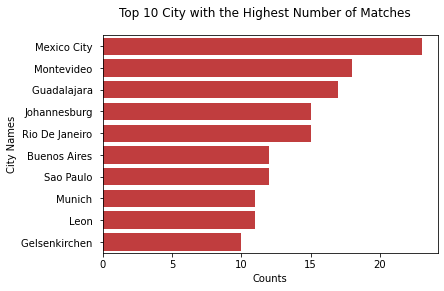

In [47]:
matches_visuals(matches, 'City')

The top 10 cities that have hosted the most matches are, Mexico City in Mexico, Montevideo in Uruguay, Guadalajara also in Mexico, Johannesburg in South Africa and Rio De Janeiro in Brazil, Buenos Aires in Argentina, Sao Paulo in Brazil, Munich in Germany, Leon can not be assigned, because its a city in different countries  and Gelsenkirchen in Germany also.

*Note*: There is also a Leon in Spain, but how do we confirm the Leon is that of Mexico or Spain or other countries, let's see if we can find out with other variables

Let's check if the top cities are as a result of hosting the tournament.

### Countries that have hosted World Cup the most

In [48]:
# create another function that would be used to check the univariate variable in preview dataset
def preview_visuals(data, variables):
    var = data[variables].value_counts()
    plt.figure(figsize=(10, 6))
    base_color = sb.color_palette()[8]
    sb.barplot(var.values, var.index, color=base_color)
    plt.suptitle('The Top {}'.format(variables))
    plt.xlabel('Counts')
    plt.ylabel('{} Names'.format(variables))
    plt.show();

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


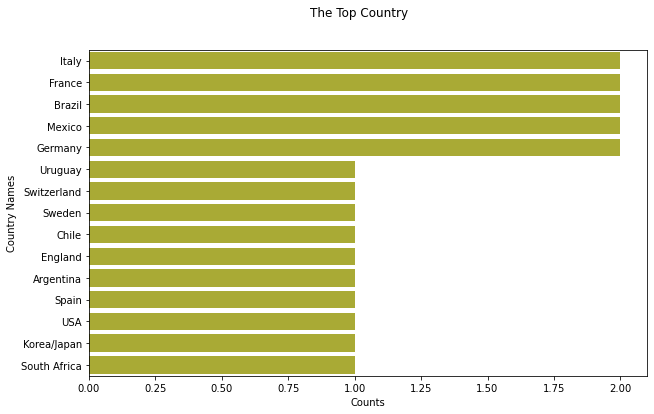

In [49]:
preview_visuals(preview, 'Country')

Italy, France, Brazil, Mexico, Germany have all hosted twice. While Uruguay, Switzerland, Sweden, Chile, England, Argentina, Spain, USA, Korea/Japan and South Africa (the only Africa country to have hosted the tournament) have all hosted once.

There was need to buttress further to get the reasons behind the cities with the highest matches hosted. And this lead to more questions;
>1. Why is it that **Italy** and **France** that have also hosted 2 tournament like **Brazil**, **Mexico** and **Germany**, does not have a city that have hosted more matches? 
>2. *Montevideo* capital of **Uruguay** and *Johannesburg* city in **South Africa** with just 1 tournament have more matches hosted. Why?

Possible answers are;
>1. Are more matches played during that year the countries hosted that could have resulted in the cities hosting more matches?
>2. Perhaps, matches have been spread across the cities of **Italy** and **France** that resulted in not having a city with more matches hosted.

All these would be answered when we work on Bivariate Exploration


We still need more questions 

Let's check the other univariate variables across the 3 datasets
1. Matches dataset first
2. Players dataset
3. Preview dataset

### Stadium that have hosted the most matches over the years

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


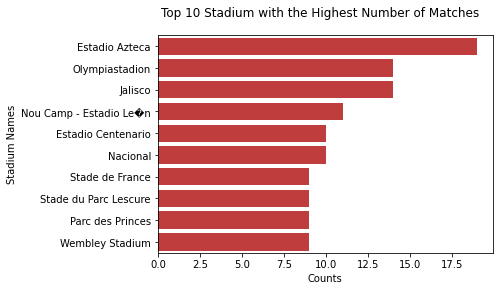

In [50]:
matches_visuals(matches, 'Stadium')

The top stadium with highest number of matches are; 
1. Estadio Azteca located in Mexico City, Mexico
2. Olympiastadion located in Munich, Germany
3. Jalisco located in Guadalajara, Mexico
4. Nou Camp (unofficially known as that) - Estadio Leon in Leon, Mexico
5. Estadion Centenario in Montevideo, Uruguay
6. Nacional, this could not be associated to any country because, some countries has their stadium named Nacional (National in English)
7. Stade de France located in Saint-Denis, France
8. Stade du Parc Lescure (now known as Stade Chaban-Delmas) located in Bordeaux
9. Parc des Princes located in Paris, france
10. Wembley Stadium located London, England

This shows top stadiums coincides with the top city plot above.
   

Will these top stadiums still remains based on attendance? This will also be confirmed at Bivariate Exploration section

Let's check which Referees and it Assistant 1 and Assistant 2 have officiated the most in world cup history.

### Referee with the highest number of Officiation

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


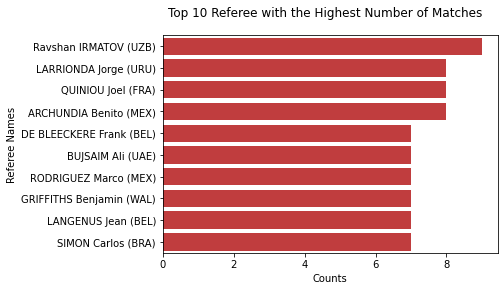

In [51]:
matches_visuals(matches, 'Referee')

Ravshan IRMATOV from Uzbekistan holds the records (9), he has officiated the most, followed by LARRIONDA Jorge (Uruguay), QUINIOU Benito (France) and DE BLEECKERE Frank (Belgium) with same number of officated matches (8).

### Referee Assistant (1 and 2)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


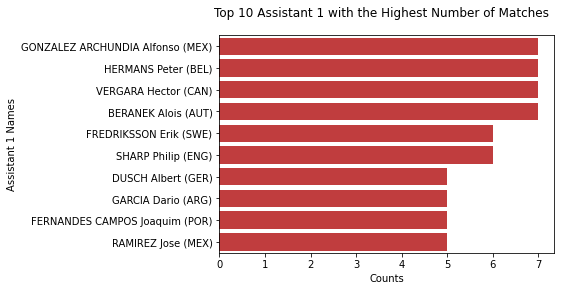

In [52]:
# Referee Assistant 1
matches_visuals(matches, 'Assistant 1')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


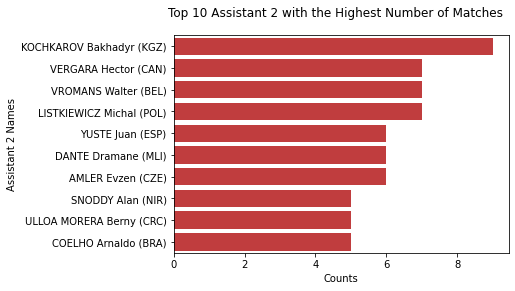

In [53]:
# Referee Assistant 2
matches_visuals(matches, 'Assistant 2')

- Assistant 1; GONZALEZ ARCHUNDIA Alfonso (Mexico), HERMANS Peter (Belgium), VERGARA Hector (Canada) and BERANEK Alois(Austria) follows next with (7) each. 
- Assistant 2; KOCHKAROV Bakhadyr (Kyrgyzstan) holds the record with 9. VERGARA Hector (Canada), VROMANS Walter (Belgium) and LISTKIEWICZ Michal (Poland) follows with 7 matches, then YUSTE Juan (Spain) with 6.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


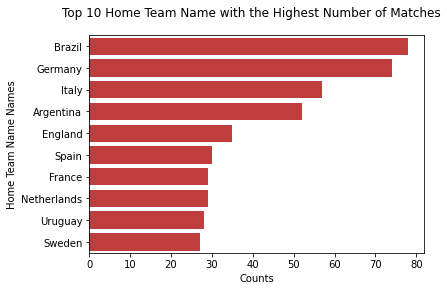

In [54]:
matches_visuals(matches, 'Home Team Name')

Teams with the highest number of matches as the home team are;
1. Brazil    78
2. Germany   74
3. Italy     57
4. Argentina 52
5. England   35

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


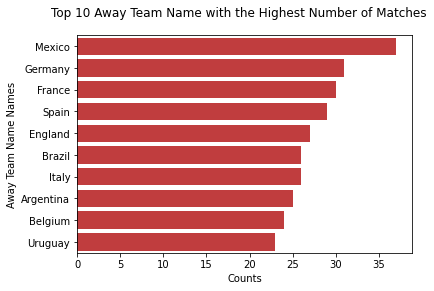

In [55]:
matches_visuals(matches, 'Away Team Name')

Teams with the highest number of matches as the away team are;
1. Mexico  37
2. Germany 31
3. France  30
4. Spain   29
5. England 27

Generally, the top 5 teams with the highest appearances;
Germany, Brazil, Italy, Argentina and England

Let's move to the next dataset; players

### Coach with the highest appearances at World Cup

In [56]:
# create another function that would be used to check the univariate variable in players dataset
def players_visuals(player, variables):
    var = player[variables].value_counts()[:10]
    base_color = sb.color_palette()[4]
    sb.barplot(var.values, var.index, color=base_color)
    plt.suptitle('Top 10 {} with the Highest Number of Matches'.format(variables))
    plt.xlabel('Counts')
    plt.ylabel('{}'.format(variables))
    plt.show();

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


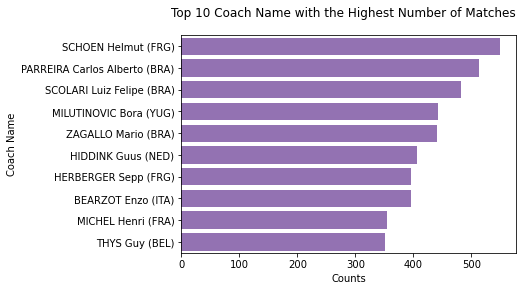

In [57]:
# coach with the highest appearnce
players_visuals(players, 'Coach Name')

In [58]:
players['Coach Name'].value_counts()

SCHOEN Helmut (FRG)               550
PARREIRA Carlos Alberto (BRA)     514
SCOLARI Luiz Felipe (BRA)         483
MILUTINOVIC Bora (YUG)            443
ZAGALLO Mario (BRA)               440
                                 ... 
PASCUCCI Felipe (ITA)              18
VAN MASTENBROEK Johannes (NED)     18
McREA James (SCO)                  17
LUIZ VINHAES (BRA)                 17
RADULESCU Constantin (ROU)         15
Name: Coach Name, Length: 335, dtype: int64

The top 5 are;
1. SCHOEN Helmut (FRG)               550
2. PARREIRA Carlos Alberto (BRA)     514
3. SCOLARI Luiz Felipe (BRA)         483
4. MILUTINOVIC Bora (YUG)            443
5. ZAGALLO Mario (BRA)               440

And the bottom 5 are;

1. PASCUCCI Felipe (ITA)              18
2. VAN MASTENBROEK Johannes (NED)     18
3. McREA James (SCO)                  17
4. LUIZ VINHAES (BRA)                 17
5. RADULESCU Constantin (ROU)         15

Coaches that have managed the most matches have been from Brazil


Let's move to the last dataset; preview

### Countries that have won the World Cup the most

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


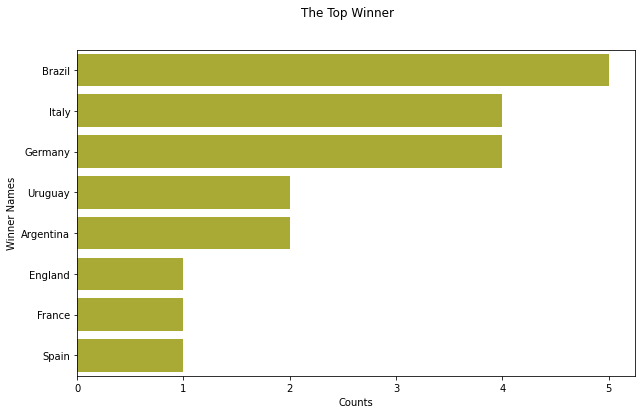

In [59]:
preview_visuals(preview, 'Winner')

- Brazil have won the most world cups 5
- Italy and Germany, 4 each
- Uruguay and Argentina, 2 each
- England, France and Spain, 1 each

### The most Runner-up countries in World Cup History

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


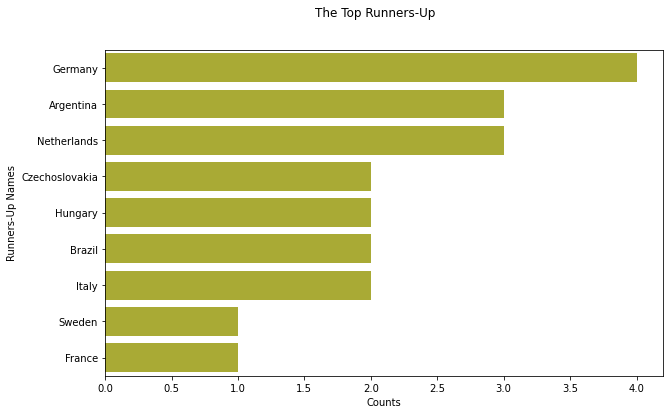

In [60]:
preview_visuals(preview, 'Runners-Up')

The Runners-Up are;
1. Germany - 4
2. Argentina and Netherlands - 3 each
3. Czechoslovakia, Hungary, Brazil and Italy - 2 each
4. Sweden and France 

### The most Third placed Team in the History of World Cup

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


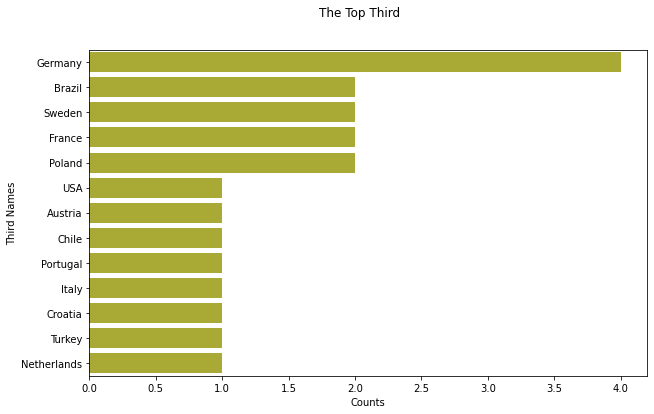

In [61]:
preview_visuals(preview, 'Third')

The most third placed teams;
1. Again Germany - 4
2. Brazil, Sweden, France, Poland - 2 each
3. USA, Austria, Chile, Portugal, Italy, Croatia, Turkey and Netherlands -have been 3rd once.

### The most Fourth placed Team in the History of World Cup

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


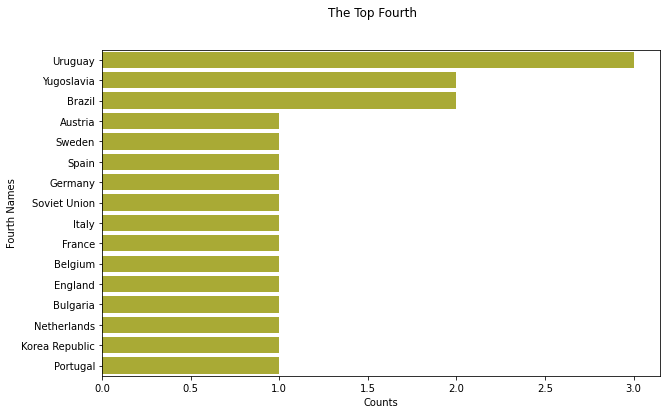

In [62]:
preview_visuals(preview, 'Fourth')

The most 4th place team is Uruguay. Notice, Brazil, Germany still appeared, this just show and prove how consistent they have been. 

### Attendance Distribution Over the Years

In [63]:
preview['Attendance'].describe()

count    2.000000e+01
mean     1.872882e+06
std      1.071842e+06
min      3.630000e+05
25%      8.748315e+05
50%      1.734864e+06
75%      2.725173e+06
max      3.587538e+06
Name: Attendance, dtype: float64

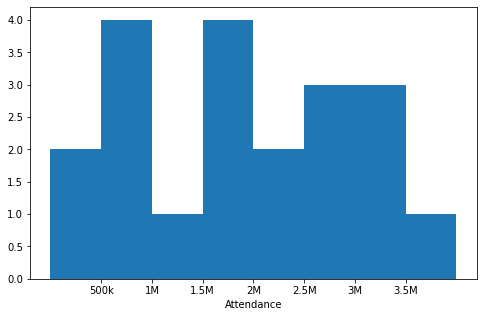

In [64]:
binsize = np.arange(0, preview['Attendance'].max()+500000, 500000)
plt.figure(figsize=[8, 5])
plt.hist(data=preview, x='Attendance', bins=binsize)
plt.xticks([5e5, 1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6], ['500k', '1M', '1.5M', '2M', '2.5M', '3M', '3.5M'])
plt.xlabel('Attendance')
plt.show();

Generally, the average attendance at the world cup would be millions. However, they have been tournament that have around 500k+ spectators. And in some tournaments, attendance have been over 1 million, and the most occuring attendance have been within 1.5 million to 2 million. Also, some tournaments have been able to produce over 3 million people.

### Distribution of the Goals scored over all the tournaments

In [65]:
preview['GoalsScored'].describe()

count     20.000000
mean     118.950000
std       32.972836
min       70.000000
25%       89.000000
50%      120.500000
75%      145.250000
max      171.000000
Name: GoalsScored, dtype: float64

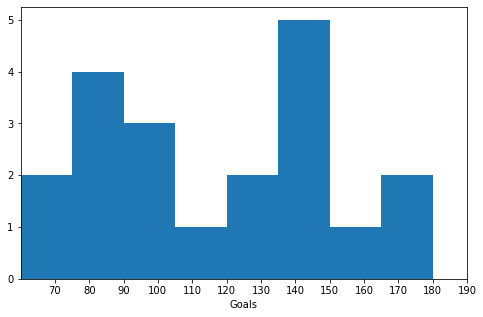

In [66]:
binsize = np.arange(0, preview['GoalsScored'].max()+15, 15)
plt.figure(figsize=[8, 5])
plt.hist(data=preview, x='GoalsScored', bins=binsize)
plt.xlim(60, 180)
plt.xticks([70,80,90,100,110,120,130,140,150,160,170,180,190], ['70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190'])
plt.xlabel('Goals')
plt.show();

Most goals scored in the history world cup have been within the range of 140 to 149, then around 80 to 90 goals occuring next. Though, goals scored over all the tournamnet have really varied, cases as low as 70 goals and as high as 170 goals.

Which side tends to win more, is it the home team or away team?

### Side with the Highest Win Rate

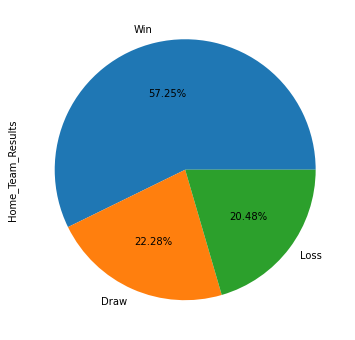

In [67]:
matches['Home_Team_Results'].value_counts().plot(kind='pie', autopct = '%1.2f%%', figsize = (6,6));

Home Teams tends to win more, compared to Away Team

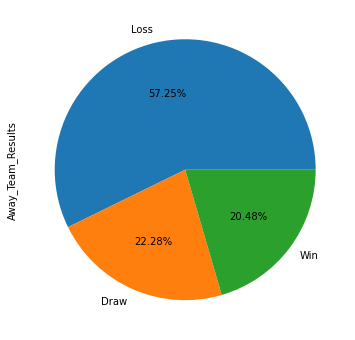

In [68]:
matches['Away_Team_Results'].value_counts().plot(kind='pie', autopct = '%1.2f%%', figsize = (6,6));

This is just mere confirmation to the plot above it. So we can say, since the inception of world cup, the probability of wining as the home side team is approximately 57%. And which is the same probability of lossing as the away team.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No transformation was made

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During my investigation, I had to make some changes to the dataset, that assisted for proper analysis.
1. Created 2 new columns on matches dataset, `Home_Team_Results` and `Away_Team_Results`, these would tell the results of each matches played, either win, loss or draw.
2. The former name given to Germany was in **Germany FR**. I had to change it to Germany.
3. Change the `Attendance` column in preview dataset from object or int64.

## Bivariate Exploration


Firstly, the questions gotten from the previous section;
>1. Why is it that **Italy** and **France** that have also hosted 2 tournament like **Brazil**, **Mexico** and **Germany**, does not have a city that have hosted more matches? 
>2. *Montevideo* capital of **Uruguay** and *Johannesburg* city in **South Africa** with just 1 tournament have more matches hosted. Why?

Possible answers are;
>1. Are more matches played during that year the countries hosted that could have resulted in the cities hosting more matches?
>2. Perhaps, matches have been spread across the cities of **Italy** and **France** that resulted in not having a city with more matches hosted.

Let's see if possible answer 1 is the solution to the questions.

In [69]:
# 2-way Table
# # Group by Function

preview.groupby(['Year', 'Country'])['Country', 'MatchesPlayed'].sum()

<ipython-input-69-bbffa823825a>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  preview.groupby(['Year', 'Country'])['Country', 'MatchesPlayed'].sum()


,,MatchesPlayed
Year,Country,
1930,Uruguay,18
1934,Italy,17
1938,France,18
1950,Brazil,22
1954,Switzerland,26
1958,Sweden,35
1962,Chile,32
1966,England,32
1970,Mexico,32


### Total Matches Played in each Tournament Year

<ipython-input-70-25a10778220c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  preview.groupby(['Year', 'Country'])['Country', 'MatchesPlayed'].sum().plot(kind='bar', figsize=[12, 6]);


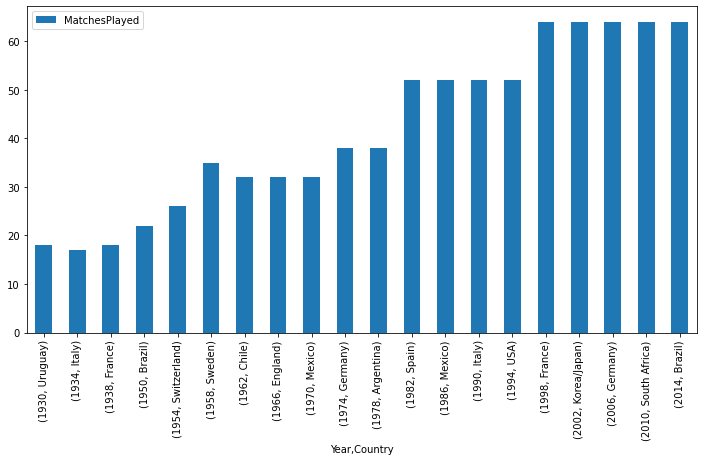

In [70]:
preview.groupby(['Year', 'Country'])['Country', 'MatchesPlayed'].sum().plot(kind='bar', figsize=[12, 6]);

The answer is **No**, we still need to check *answer 2*. 

Key takeaways;
1. This tells us that **Uruguay** as a one time country-host with just 18 matches played have a city its capital *Montevideo* that have more matches played. This could be said that most of the matches played as at the year 1930 were played mostly at it capital. 
2. Even though **Italy** and **France** had hosted 17 and 18 matches respectively as at the first time they hosted the world cup. However, they pretty much had more matches the next time they hosted, 52 and 64 matches respectively, still, they do not have a city that have more matches hosted than the top 10 cities.
3. *Mexico city* and *Guadalajar* in **Mexico**, the 1st and 3rd city with higest number of matches, have a fair reason to that. 32 and 52 matches hosted the first 2 times. Though this does not necessarily change the fact that, most of those matches might have been played in those 2 cities. Same scenerio with **Brazil** and **Germany** too.
4. **South Africa** that hosted just once also, although with 64 matches played. *Johannesburg* could be the city in **South Africa** that have hosted the most matches back then in 2010.

Now, let's see if possible answer 2 could get us more insight

In [71]:
matches['Home Team Name'].value_counts()

Brazil                        78
Germany                       74
Italy                         57
Argentina                     52
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 77, dtype: int64

We would be focusing on just 7 countries. 'France', 'Italy', 'South Africa', 'Uruguay', 'Mexico', 'Brazil', 'Germany'

In [72]:
# considering only 7 countries, 'France', 'Italy', 'South Africa', 'Uruguay', 'Mexico', 'Brazil', 'Germany', 'Germany FR'
home_team_select = matches.loc[matches['Home Team Name'].isin(['France', 'Italy', 'South Africa', 'Uruguay', 'Mexico', 'Brazil', 'Germany'])]
away_team_select = matches.loc[matches['Away Team Name'].isin(['France', 'Italy', 'South Africa', 'Uruguay', 'Mexico', 'Brazil', 'Germany'])]

In [73]:
# need to check how these teams have been distributed as home or away team across the cities
home_team = home_team_select.groupby(['Home Team Name', 'City'])[['City']].count()
away_team = home_team_select.groupby(['Away Team Name', 'City'])[['City']].count()

In [74]:
print(home_team.shape)
print(away_team.shape)

(186, 1)
(273, 1)


Let's check if we can get a city in those country that have hosted more, most concern is for **FRANCE** and **ITALY**. 

NOTE: The cities that would be listed is not only cities in those countries, but everyother cities they have played. However, more concern is on cities with 3 or more matches of that country and check the how spread out are their matches across the cities. 

In [75]:
# BRAZIL
home_team.loc['Brazil','City'], away_team.loc['Brazil','City']

(City
 Belo Horizonte        2
 Berlin                1
 Bordeaux              3
 Brasilia              1
 Buenos Aires          1
 Detroit               1
 Dortmund              1
 Fortaleza             2
 Frankfurt/Main        2
 Geneva                1
 Gothenburg            3
 Guadalajara           8
 Hanover               1
 Jeju                  1
 Johannesburg          3
 Kobe                  1
 Lausanne              1
 Liverpool             1
 Los Angeles           1
 Mar Del Plata         2
 Marseilles            2
 Mendoza               2
 Mexico City           1
 Montevideo            1
 Munich                2
 Nantes                2
 Paris                 1
 Rio De Janeiro        4
 Saint-Denis           2
 Saitama               1
 San Francisco         3
 Santiago De Chile     2
 Sao Paulo             2
 Seville               3
 Solna                 2
 Strasbourg            1
 Turin                 4
 Udevalla              1
 Ulsan                 1
 Vina Del Mar      

In [76]:
# URUGUAY
home_team.loc['Uruguay','City'], away_team.loc['Uruguay','City']

(City
 Arica                                 1
 Basel                                 2
 Belo Horizonte                        1
 Berne                                 1
 Cape Town                             2
 Fortaleza                             1
 Hanover                               1
 Johannesburg                          1
 London                                2
 Mexico City                           1
 Montevideo                            4
 Nelson Mandela Bay/Port Elizabeth     2
 Puebla                                2
 Queretaro                             1
 Rio De Janeiro                        1
 Sao Paulo                             3
 Udine                                 1
 Ulsan                                 1
 Name: City, dtype: int64,
 City
 Busan                1
 Guadalajara          1
 Mexico City          1
 Natal                1
 Phokeng              1
 Rome                 1
 Sheffield            1
 Tshwane/Pretoria     1
 Name: City, dtype: int64)

In [77]:
# FRANCE
home_team.loc['France','City'], away_team.loc['France','City']

(City
 Brasilia                  1
 Busan                     1
 Colombes                  1
 Geneva                    1
 Gothenburg                1
 Guadalajara               1
 Leipzig                   1
 Lens                      1
 Leon                      1
 London                    1
 Lyon                      1
 Madrid                    1
 Mangaung/Bloemfontein     1
 Mar Del Plata             1
 Marseilles                1
 Montevideo                1
 Norrk�Ping                2
 Orebro                    1
 Polokwane                 1
 Porto Alegre              1
 Puebla                    1
 Rio De Janeiro            1
 Saint-Denis               2
 Seoul                     1
 Stuttgart                 1
 Valladolid                2
 Name: City, dtype: int64,
 City
 Berlin             1
 Cape Town          1
 Colombes           1
 Frankfurt/Main     1
 Guadalajara        1
 London             1
 Mar Del Plata      1
 Mexico City        1
 Saint-Denis        2
 Seville 

In [78]:
# ITALY
home_team.loc['Italy','City'], away_team.loc['Italy','City']

(City
 Barcelona               2
 Bari                    1
 Berlin                  1
 Bordeaux                1
 Boston                  1
 Buenos Aires            2
 Cape Town               1
 Colombes                2
 Florence                2
 Hamburg                 1
 Hanover                 1
 Ibaraki                 1
 Kaiserslautern          2
 Lugano                  1
 Madrid                  1
 Mar Del Plata           2
 Marseilles              3
 Mexico City             2
 Milan                   1
 Montpellier             1
 Munich                  1
 Naples                  1
 Natal                   1
 Nelspruit               1
 New York/New Jersey     2
 Puebla                  1
 Recife                  1
 Rome                    7
 Saint-Denis             2
 Santiago De Chile       1
 Sao Paulo               1
 Sapporo                 1
 Sunderland              1
 Toluca                  3
 Vigo                    3
 Washington Dc           1
 Name: City, dtype: in

In [79]:
# ONLY ROME IN ITALY
matches[matches['City'] == 'Rome ']

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home_Team_Results,Away_Team_Results
24,1934,1934-05-27 16:30:00,Preliminary round,Nazionale PNF,Rome,Italy,7,1,USA,25000.0,3,0,MERCET Rene (SUI),ESCARTIN Pedro (ESP),ZENISEK Bohumil (TCH),Win,Loss
32,1934,1934-06-03 16:30:00,Semi-finals,Nazionale PNF,Rome,Czechoslovakia,3,1,Germany,15000.0,1,0,BARLASSINA Rinaldo (ITA),BERANEK Alois (AUT),ESCARTIN Pedro (ESP),Win,Loss
34,1934,1934-06-10 17:30:00,Final,Nazionale PNF,Rome,Italy,2,1,Czechoslovakia,55000.0,0,0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),Win,Loss
415,1990,1990-06-09 21:00:00,Group A,Stadio Olimpico,Rome,Italy,1,0,Austria,73303.0,0,0,RAMIZ WRIGHT Jose (BRA),PEREZ HOYOS Armando (COL),SILVA VALENTE Carlos Alberto (POR),Win,Loss
427,1990,1990-06-14 21:00:00,Group A,Stadio Olimpico,Rome,Italy,1,0,USA,73423.0,1,0,CODESAL MENDEZ Edgardo (MEX),CARDELLINO DE SAN VICENTE Juan (URU),ULLOA MORERA Berny (CRC),Win,Loss
440,1990,1990-06-19 21:00:00,Group A,Stadio Olimpico,Rome,Italy,2,0,Czechoslovakia,73303.0,1,0,QUINIOU Joel (FRA),VAN LANGENHOVE Marcel (BEL),SMITH George (SCO),Win,Loss
453,1990,1990-06-25 21:00:00,Round of 16,Stadio Olimpico,Rome,Italy,2,0,Uruguay,73303.0,0,0,COURTNEY George (ENG),ROETHLISBERGER Kurt (SUI),PETROVIC Zoran (SRB),Win,Loss
457,1990,1990-06-30 21:00:00,Quarter-finals,Stadio Olimpico,Rome,Italy,1,0,"rn"">Republic of Ireland",73303.0,1,0,SILVA VALENTE Carlos Alberto (POR),PEREZ HOYOS Armando (COL),ULLOA MORERA Berny (CRC),Win,Loss
463,1990,1990-07-08 20:00:00,Final,Stadio Olimpico,Rome,Germany,1,0,Argentina,73603.0,0,0,CODESAL MENDEZ Edgardo (MEX),PEREZ HOYOS Armando (COL),LISTKIEWICZ Michal (POL),Win,Loss


In [80]:
# MEXICO
home_team.loc['Mexico','City'], away_team.loc['Mexico','City']

(City
 Hanover                 1
 Jeonju                  1
 Mexico City             5
 Natal                   1
 New York/New Jersey     1
 Nuremberg               1
 Oita                    1
 Orlando                 1
 Phokeng                 1
 Rifu                    1
 Solna                   1
 Vina Del Mar            1
 Name: City, dtype: int64,
 City
 Cordoba            1
 Fortaleza          1
 Geneva             2
 Johannesburg       1
 London             2
 Monterrey          1
 Montevideo         1
 Montpellier        1
 Polokwane          1
 Rio De Janeiro     1
 Toluca             1
 Vina Del Mar       1
 Washington Dc      1
 Name: City, dtype: int64)

In [81]:
# GERMANY
home_team.loc['Germany','City'], away_team.loc['Germany','City']

(City
 Basel                                 1
 Berlin                                1
 Berlin West                           1
 Berne                                 2
 Birmingham                            2
 Buenos Aires                          2
 Chicago                               3
 Cordoba                               3
 Dallas                                1
 Dortmund                              2
 Durban                                2
 D�Sseldorf                            1
 Florence                              1
 Fortaleza                             1
 Geneva                                1
 Gijon                                 3
 Helsingborg                           1
 Ibaraki                               1
 Jeju                                  1
 Lens                                  1
 Leon                                  4
 Liverpool                             1
 Lyon                                  1
 Madrid                                2
 Malm�    

In [82]:
# SOUTH AFRICA
home_team.loc['South Africa','City'], away_team.loc['South Africa','City']

(City
 Bordeaux             1
 Daegu                1
 Daejeon              1
 Johannesburg         1
 Toulouse             1
 Tshwane/Pretoria     1
 Name: City, dtype: int64,
 City
 Mangaung/Bloemfontein     1
 Marseilles                1
 Name: City, dtype: int64)

In [83]:
# Johannesburg in South Africa
matches[matches['City'] == 'Johannesburg ']

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home_Team_Results,Away_Team_Results
708,2010,2010-06-11 16:00:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,84490.0,0,0,Ravshan IRMATOV (UZB),ILYASOV Rafael (UZB),KOCHKAROV Bakhadyr (KGZ),Draw,Draw
711,2010,2010-06-12 16:00:00,Group B,Ellis Park Stadium,Johannesburg,Argentina,1,0,Nigeria,55686.0,1,0,Wolfgang STARK (GER),SALVER Jan-Hendrik (GER),PICKEL Mike (GER),Win,Loss
716,2010,2010-06-14 13:30:00,Group E,Soccer City Stadium,Johannesburg,Netherlands,2,0,Denmark,83465.0,0,0,St�phane LANNOY (FRA),DANSAULT Eric (FRA),UGO Laurent (FRA),Win,Loss
721,2010,2010-06-15 20:30:00,Group G,Ellis Park Stadium,Johannesburg,Brazil,2,1,Korea DPR,54331.0,0,0,KASSAI Viktor (HUN),EROS Gabor (HUN),VAMOS Tibor (HUN),Win,Loss
725,2010,2010-06-17 13:30:00,Group B,Soccer City Stadium,Johannesburg,Argentina,4,1,Korea Republic,82174.0,2,1,DE BLEECKERE Frank (BEL),HERMANS Peter (BEL),VROMANS Walter (BEL),Win,Loss
729,2010,2010-06-18 16:00:00,Group C,Ellis Park Stadium,Johannesburg,Slovenia,2,2,USA,45573.0,2,0,Koman COULIBALY (MLI),ACHIK Redouane (MAR),MANUEL CANDIDO Inacio (ANG),Draw,Draw
736,2010,2010-06-20 20:30:00,Group G,Soccer City Stadium,Johannesburg,Brazil,3,1,C�te d'Ivoire,84455.0,1,0,St�phane LANNOY (FRA),DANSAULT Eric (FRA),UGO Laurent (FRA),Win,Loss
739,2010,2010-06-21 20:30:00,Group H,Ellis Park Stadium,Johannesburg,Spain,2,0,Honduras,54386.0,1,0,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),JEONG Hae Sang (KOR),Win,Loss
746,2010,2010-06-23 20:30:00,Group D,Soccer City Stadium,Johannesburg,Ghana,0,1,Germany,83391.0,0,0,SIMON Carlos (BRA),HAUSMANN Altemir (BRA),BRAATZ Roberto (BRA),Loss,Win
748,2010,2010-06-24 16:00:00,Group F,Ellis Park Stadium,Johannesburg,Slovakia,3,2,Italy,53412.0,1,0,WEBB Howard (ENG),Darren CANN (ENG),MULLARKEY Michael (ENG),Win,Loss


For the countries checked except France, had cities hosting 3 or more matches, and we could see matches played in **France** were distributed across it cities. 
Notice that; 
>1. *Rome* in **Italy** had hosted herself 7 times. So, we had to check how many times did Rome appeared and why it was not in top 10? Then we realized it hosted just 9 matches, making it the 11th top city with highest matches hosted. 

>2. *Johannesburg* in **South Africa** did not appear frequently, and there is need to check. And noticed, it hosted different matches across different countries.

>3. This just proved that matches in France have been spread out across their cities, not more than 2 matches per city.

Now, let's check average number of attendance per `City` and `Stadium`

### Stadiums with the Highest Attendance over the Years

Create a function that would be used to view the attendnace across the following viarbles; `Stadiums`,`City`,`Home Team Name`, and `Away Team Name`

In [84]:
def average_attendance(data, variable):
    data_attendance = data.groupby(variable).Attendance.mean()
    data_attendance = data_attendance.to_frame().groupby(level=variable).Attendance.nlargest().to_frame()
    data_attendance.reset_index(level=1, inplace=True)
    data_attendance_sort = data_attendance.sort_values('Attendance', ascending=False)[:10]
    data_attendance_sort.plot.bar(color='orange', title='{} with the Higest Attendance'.format(variable), xlabel='{}'.format(variable), ylabel='Attendance');

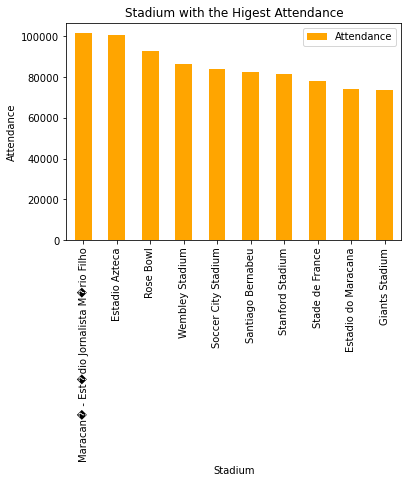

In [85]:
average_attendance(matches, 'Stadium')

Will the top stadiums based on matches still remains based on attendance?

Stadiums with the highest average attendance ever are;
1. Maracana - Estadio Jornalista Mario Filho located in Rio De Janeiro, Brazil(one of the cities with most appearance at world cup), over 100k+ average attendance.
2. Estadio Azteca in Mexico City, Mexico
3. Rose Bowl in California, USA
4. Wembley Stadium in London, England
5. Soccer City Stadium in Johannesburg, South Africa (also one of the cities with the most appearance at world cup), over 80+k average attendance.

We could see some stadiums based on matches also appeared here based on attendance; 
- Estadio Azteca in Mexico
- Wembley Stadium in England
- Stade de France in France

In Mexico, the most used stadium in world cup matches have been from Mexico city.

### Cities with the Highest Attendance over the Years

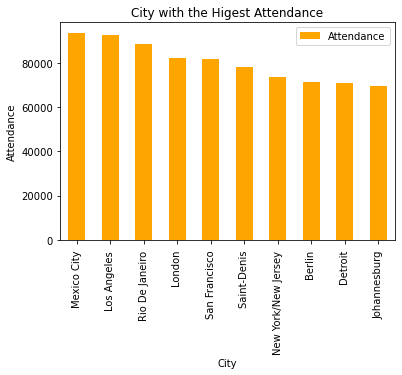

In [86]:
average_attendance(matches, 'City')

Firstly, we can say that stadium such as Estadio Azteca in Mexico city, Mexico, Maracana in Rio De Janeiro, Brazil and Wembley in London, England are the major reason those cities have had lots of attendance at world cup.
The top 5 cities based on average attendance are;
1. Mexico city in Mexico
2. Los Angeles in USA
3. Rio De Janeiro in Brazil
4. London in England
5. San Francisco in USA

USA appearing twice need attention, perhaps the year USA hosted the world cup have been the year with most attendance ever in the history of world cup. This would be confirmed.

### Home Teams that have had the highest attendance

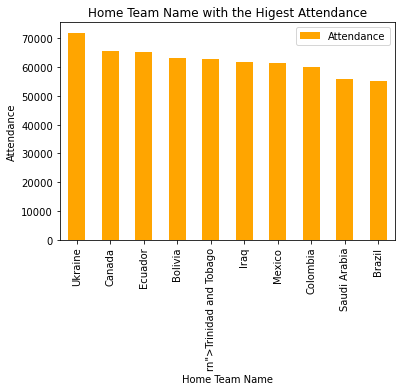

In [87]:
average_attendance(matches, 'Home Team Name')

Based on being the home team, top 3 countries with average highest attendance are Ukraine, Canada, and Ecuador.

### Away Teams that have had the highest attendance

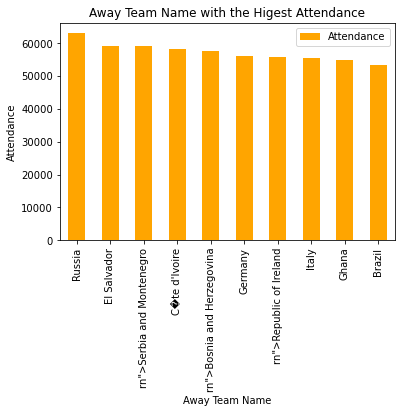

In [88]:
average_attendance(matches, 'Away Team Name')

Based on being the away team, top 3 countries with average highest attendance are Russia, El Salvador, and Serbi & Montenegro.

Let's check for Goals scored at Half-Time by Home Team and Away Team, to see if Home Teams tend to score more than Away Teams.

### Home Team Goals at Half-Time

In [89]:
def average_goals(data, variable1, variable2):
    data_goals = data.groupby(variable1)[variable2].mean()
    data_goals = data_goals.to_frame().groupby(level=variable1)[variable2].nlargest().to_frame()
    data_goals.reset_index(level=1, inplace=True)
    data_goals_sort = data_goals.sort_values(variable2, ascending=False)[:10]
    data_goals_sort.plot.bar(color='green', title='{} Average Goals at Half-Time'.format(variable1), xlabel='{}'.format(variable1), ylabel='Half-Time Goals');

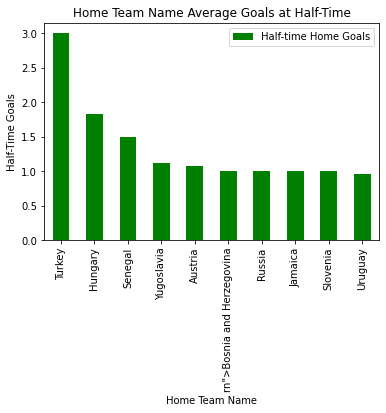

In [90]:
average_goals(matches, 'Home Team Name', 'Half-time Home Goals')

Based on being the Home team, countries with highest average goals at half time are;
1. Turkey (avg 3 goals at half-time)
2. Hungary (avg 1.7+ goals)
3. Senegal (avg 1.5+ goals)
4. Yugoslavia (avg 1.2+ goals)
5. Austria (avg 1.1+ goals)

But we still need to confirm if they have been more goals at half-time as the home team or not.

### Away Team Goals at Half-Time

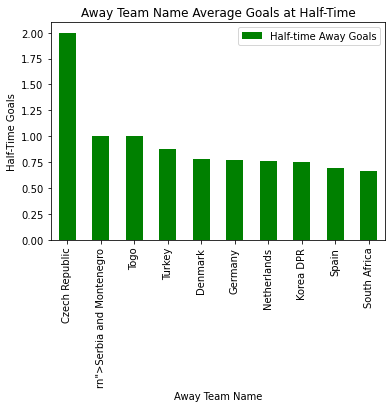

In [91]:
average_goals(matches, 'Away Team Name', 'Half-time Away Goals')

Teams with top average goals as the away team at half-time are;
1. Czech Republic (avg 2 goals)
2. Serbia and Montenegro (avg 1 goal)
3. Togo (avg 1 goal)
4. Turkey (avg 0.8+ goals)
5. Denmark (avg 0.75+ goals)

So we could see that the team with highest average goal at half-time as the away team is 2 goals. So therefore, there is more chances to score goals as the home team at half-time than being the away team. 

Note; This doesn't mean these are the teams with most goals at world cup. Teams with most goals most have played more matches. 

### All the Countries Win, Loss and Draw rate over the Years

<AxesSubplot:xlabel='Home Team Name'>

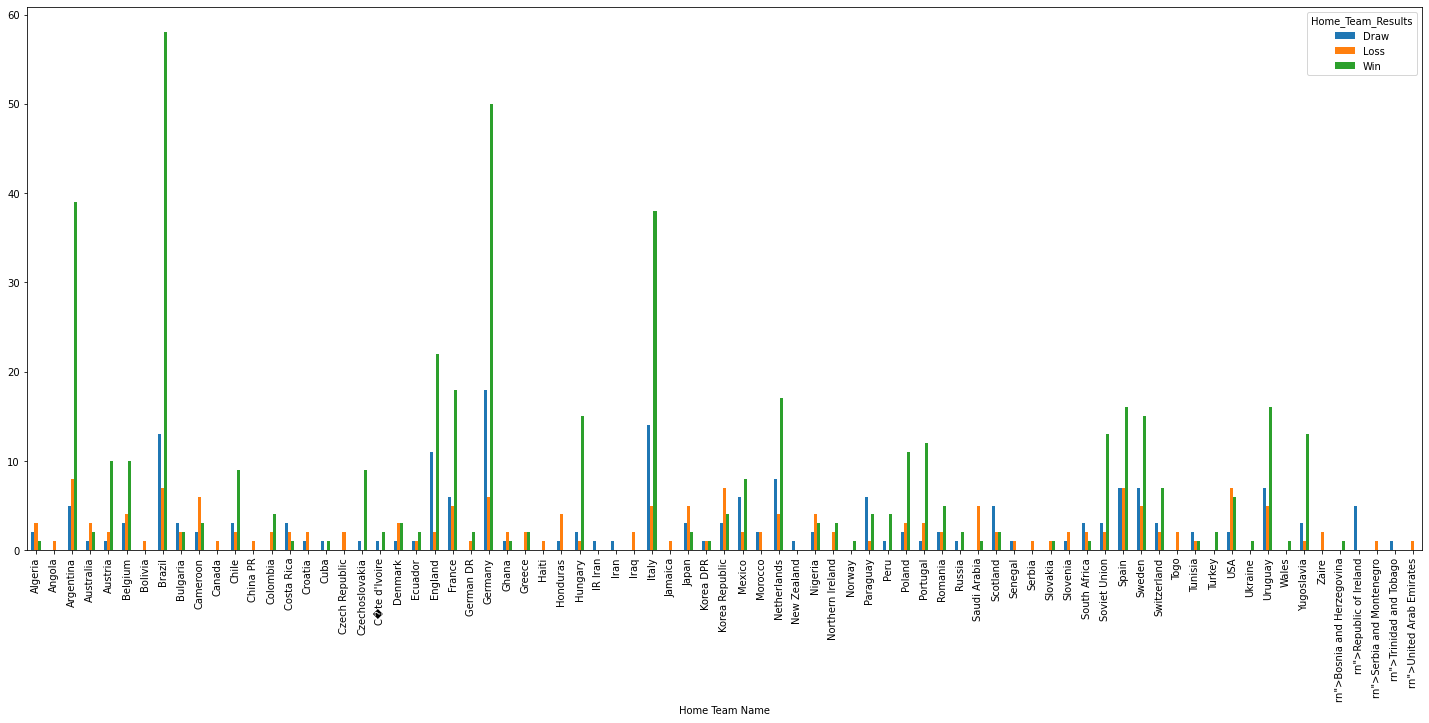

In [92]:
matches.groupby(['Home Team Name', 'Home_Team_Results'])['Home Team Name'].count().unstack().plot(kind = 'bar', stacked = False, figsize = (25,10))

These would be arranged in terms of **wins** only.

TEAMS WITH HIGHEST WINS (Picking top 5)
1. Brazil (with 5 world cups)
2. Germany (4 world cups)
3. Argentina (2 world cups)
4. Italy (4 world cups)
5. England (1 world cup)


### Total Goals Scored in each Tournament Year

<ipython-input-93-10870e4cd328>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  preview.groupby(['Year', 'Country'])['Country', 'GoalsScored'].sum().plot(kind='bar', figsize=[12, 6]);


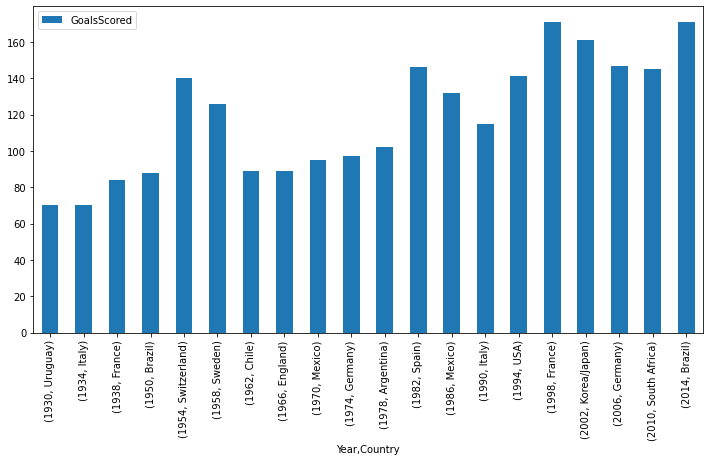

In [93]:
preview.groupby(['Year', 'Country'])['Country', 'GoalsScored'].sum().plot(kind='bar', figsize=[12, 6]);

The world cup tournament with most goals are;
1. 1998-France (171 goals)
1. 2014-Brazil (171 goals)
3. 2002-Korea/Japan (161 goals)
4. 2006-Germany (147 goals)
5. 1982-Spain (146 goals)

### Total Attendance in each Tournament Year

<ipython-input-94-b7c0e2667e71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  preview.groupby(['Year', 'Country'])['Country', 'Attendance'].sum().plot(kind='bar', figsize=[12, 6]);


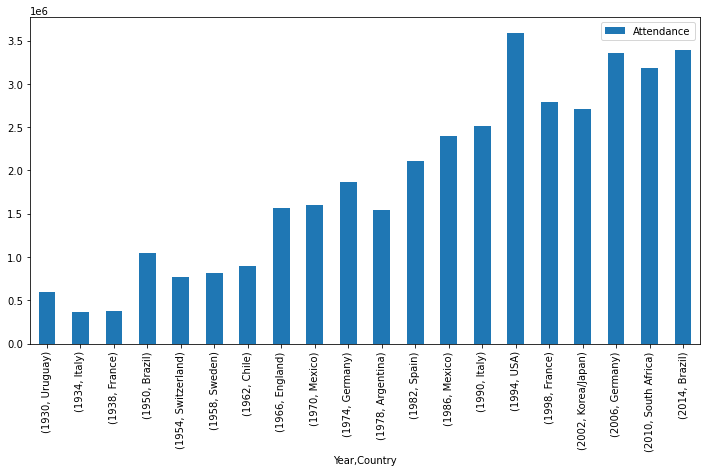

In [94]:
preview.groupby(['Year', 'Country'])['Country', 'Attendance'].sum().plot(kind='bar', figsize=[12, 6]);

The world cup tournament with most attendance are;
1. 1994-USA (3,587,538)
2. 2014-Brazil (3,386,810)
3. 2006-Germany (3,359,439)
4. 2010-South Africa (3,178,856)
5. 1998-France (2,785,100)

So this is the reason USA cities were among the top cities with most attendance.

### Total Qualified Teams in each Tournament Year

<ipython-input-95-5b6970459fc7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  preview.groupby(['Year', 'Country'])['Country', 'QualifiedTeams'].sum().plot(kind='bar', figsize=[12, 6]);


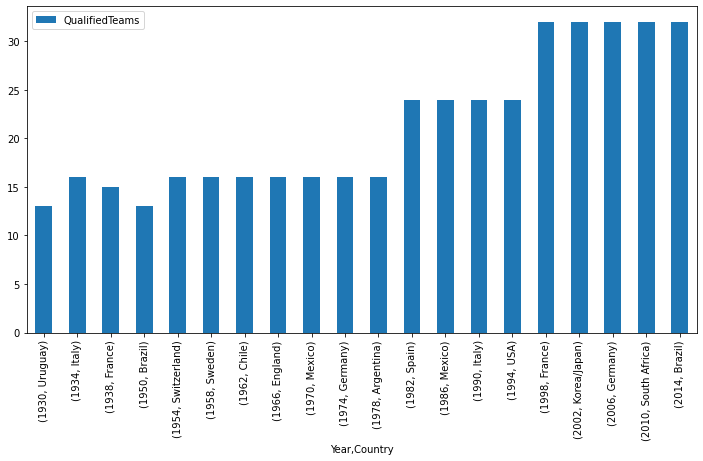

In [95]:
preview.groupby(['Year', 'Country'])['Country', 'QualifiedTeams'].sum().plot(kind='bar', figsize=[12, 6]);

Qualified teams tends to change gradually, its usually concistent before it changes again.
The only first four tournaments were not concistent. However,it became constant after for some years before it then changes again. This should be a kind of rules determined by FIFA officials.
- 1930, Uruguay had 13 qualified teams.
- 1934, Italy had 16 qualified teams.
- 1938, France had 15 qualified teams.
- 1950, Brazil had 13 qualified teams.
- 1954, Switzerland to 1978, Argentina had the same qualified teams (16).
- 1982, Spain to 1994, USA also the same qualified teams (24).
- 1998, France to 2014, Brazil also had the same qualified teams (32).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The most successful team in world cup history is **Brazil** with 5 trophies. Been in 7 finals and came second twice. Also the team with most wins. They have also participated in most matches, as such it is the team with most appearance in world cup history. Rio De Janeiro have hosted the most matches and have the highest average attendance. Maracana Stadium have had the most attendance.

The other closest team is Germany, been in 8 finals and have won it 4 times. The second team with most wins. 2 of it cities were among the top 10 cities with most matches. And the second team with most appearance. 

Italy with 4 world cup trophies, twice the runners-up. And the 4th team with most wins in world cup history.

Other notable mentions; Argentina and Uruguay(2 world cup trophies), England, France and Spain (1 world cup trophy). 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Other facts gotten from other features are;

1. Mexico is the country with most attendance per match and average attendance in world cup history. Estadio Azteca in Mexico city have hosted the most matches and the 2nd highest average attendance.
2. Coach- Schoen Helmut (Germany) have managed the most matches in world cup history, 550 matches.
3. Referee - Ravshan Irmatov (Uzbekistan) holds the most officiated matches, 9.
4. Teams tends to win more as the home team than being the away team. 57.25% win rate as the home team, 22.28% draw, and 20.48% loss rate as the home team.
5. 1998, France to 2014, Brazil, they have played the same number of matches in their tournaments (64 matches).
6. Turkey at half-time has average the most goals being the home team in world cup history (avg 3 goals).
7. Czech Republic at half-time has average the most goals being the away team in world cup history (avg 2 goals).
8. Most goals in a tournament (171 goals), same total goals in France (1998) and Brazil (2014).
9. USA (1994) have had the highest attendance in a world cup tournament (3,587,538).
10. Recent world cup tournaments have had the same number of qualified teams, 32 teams. Which began from France (1998) - Brazil (2014).

## Multivariate Exploration

The main thing I want to explore in this part is to correlate how the most successful teams (Brazil, Germany, Italy and Argentina) have scored goals as the home team and away team.

### Country Goals Correlation Based on Home Team and Away Team

In [96]:
colors  = []

# iterate over rows of matches
for color, row in matches.iterrows():
    if row['Home Team Name'] == 'Brazil' :
        colors.append('green')
    elif row['Home Team Name'] == 'Italy' :
        colors.append('red')
    elif row['Home Team Name'] == 'Germany' :
        colors.append('yellow')
    elif row['Home Team Name'] == 'Argentina' :
        colors.append('blue')
    else:
        colors.append('white')
        
# Inspect the first 10 values in your list        
print(colors[0:10])

['white', 'white', 'white', 'white', 'blue', 'white', 'white', 'white', 'white', 'white']


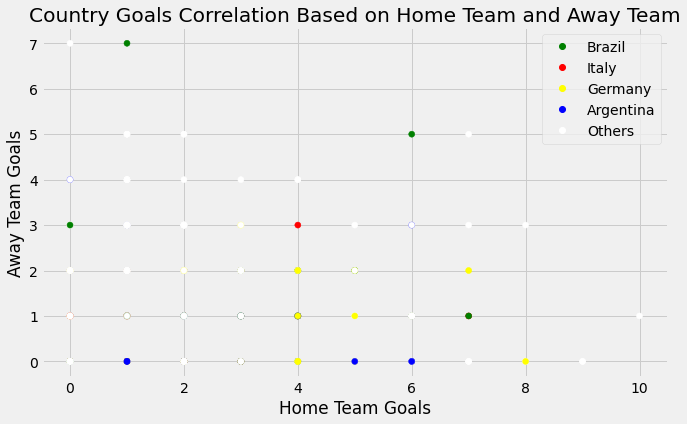

In [97]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))

# Create a scatter plot of duration versus release_year
scatter = plt.scatter(x='Home Team Goals', y='Away Team Goals', data=matches, c=colors)

# Create a title and axis labels
plt.title("Country Goals Correlation Based on Home Team and Away Team")
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")

# creating our own legend
import matplotlib.lines as mlines
brazil = mlines.Line2D([], [], color='green', marker='o', ls='', label='Brazil')
italy = mlines.Line2D([], [], color='red', marker='o', ls='', label='Italy')
germany = mlines.Line2D([], [], color='yellow', marker='o', ls='', label='Germany')
argentina = mlines.Line2D([], [], color='blue', marker='o', ls='', label='Argentina')
others = mlines.Line2D([], [], color='white', marker='o', ls='', label='Others')

plt.legend(handles=[brazil, italy, germany, argentina, others])

# Show the plot
plt.show()

The distribution of goals;
- Brazil have scored higher amount goals as the home team.
- Italy tend to score 4 goals as the home team and 3 goals as away team.
- Germany tend to score more as home team than any other team.
- Argentina does not usually score goals as an away team.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

So generally, all teams tends to score goals within 0 to 4 goals either as being the home team or away team.

### Were there any interesting or surprising interactions between features?

Its lovely to see that only the home team have managed to score over 8 goals to 10 goals. Also, home teams tends to score more goals than the away team. Home teams have scored more 5+ goals than away teams.

## Conclusions

Steps taken to ensure proper report was ensuring all features were in their appropraite type, Germany FR was changed to Germany, and creaated 2 new columns to account for results of all matches played.

In Summary;
- Best team have been brazil, 5 trophies and most appearnces and most wins
- Maracana Stadium in Brazil have had the most attendance.
- Germany is 2nd best team, 4 trophies, 2nd in most wins and appearances.
- Italy have also won 4 trophies.
- Estadio Azteca in Mexico city, Mexico have hosted the most number of matches in world cup history.
- There is more probability of wining (57.25%) as the home side than being the away side. 